# VISUALIZACION DEL IMPACTO DEL COVID-19 EN US 

Este dataset proporciona información detallada sobre casos confirmados y probables,muertes, hospitalizaciones, pruebas realizadas y otros datos relevantes relacionados con la pandemia de COVID-19 en diferentes estados o territorios.

## Línea de importación de librerías y dataset


In [458]:
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px 
import us

In [459]:
# Configuramos las opciones de visualización para mostrar todas las filas y columnas
pd.set_option('display.max_columns', None)

# Importamos dataset desde una URL
url = "https://api.covidtracking.com/v1/states/daily.json"


# Exploración Basica del Dataset

 Este dataset contiene información relacionada con el seguimiento de la pandemia de COVID-19 en diferentes estados o territorios. Cada registro en el conjunto de datos corresponde a una recopilación de datos en una fecha específica.
 
**El Proyecto de Rastreo de COVID ha finalizado la recopilación de todos los datos a partir del 7 de marzo de 2021. La API existente continuará funcionando hasta mayo de 2021, pero solo incluirá datos hasta el 7 de marzo de 2021.**


A continuación, se describen los diferentes campos presentes en el dataset:

**checkTimeEt:** Es un campo de tipo string y está marcado como "Deprecated", lo que significa que está obsoleto y ya no se utiliza.

**commercialScore:** Es un campo de tipo entero (integer) y también está marcado como "Deprecated".

**Returns:** Este campo se refiere a lo que se devuelve si no hay datos disponibles para los campos anteriores que son obsoletos. En este caso, se devuelve "null" cuando no hay datos disponibles.

**dataQualityGrade:** Es un campo de tipo string que indica la calificación de la calidad de los datos informados por un estado. Esto es proporcionado por el "The COVID Tracking Project" y se refiere a la completitud de la presentación de datos por parte de un estado.

**date:** Es un campo de tipo entero que representa la fecha en la que se recopilaron los datos por "The COVID Tracking Project".

**dateChecked:** Es un campo de tipo string y también está marcado como "Deprecated".

**dateModified:** Es un campo de tipo string y está marcado como "Deprecated". Se sugiere usar en su lugar el campo "lastUpdateEt".

**death:** Es un campo de tipo entero y representa el total de personas fallecidas con diagnóstico confirmado o probable de COVID-19. Algunos estados pueden incluir solo las muertes con COVID-19 listadas en el certificado de defunción.

**deathConfirmed:** Es un campo de tipo entero que representa el total de personas fallecidas con diagnóstico confirmado de COVID-19.

**deathIncrease:** Es un campo de tipo entero y muestra el aumento diario en el número de muertes en comparación con el valor del día anterior.

**deathProbable:** Es un campo de tipo entero que representa el total de personas fallecidas con diagnóstico probable de COVID-19.

**fips:** Es un campo de tipo string que representa el código FIPS del estado.

**grade:** Es un campo de tipo string y está marcado como "Deprecated".

**hash:** Es un campo de tipo string y está marcado como "Deprecated".

**hospitalized:** Es un campo de tipo entero y está marcado como "Deprecated".

**hospitalizedCumulative:** Es un campo de tipo entero que representa el número total de personas que han sido hospitalizadas con COVID-19 desde el inicio de la pandemia.

**hospitalizedCurrently:** Es un campo de tipo entero y muestra el número actual de personas hospitalizadas con COVID-19.

**hospitalizedDischarged:** Es un campo de tipo entero que representa el número total de pacientes de COVID-19 dados de alta del hospital.

**hospitalizedIncrease:** Es un campo de tipo entero y muestra el aumento diario en el número de hospitalizaciones en comparación con el valor del día anterior.

**inIcuCumulative:** Es un campo de tipo entero que representa el número total de personas que han sido hospitalizadas en la Unidad de Cuidados Intensivos (UCI) con COVID-19 desde el inicio de la pandemia.

**inIcuCurrently:** Es un campo de tipo entero y muestra el número actual de personas hospitalizadas en la UCI con COVID-19.

**lastUpdateEt:** Es un campo de tipo string que indica la última fecha y hora en la que el estado o territorio actualizó los datos. Esta información se proporciona en hora del Este (ET).

**negative:** Es un campo de tipo entero que representa el número total de personas con una prueba de PCR completada que da negativo.

**negativeIncrease:** Es un campo de tipo entero y está marcado como "Deprecated".

**negativeRegularScore:** Es un campo de tipo entero y está marcado como "Deprecated".

**negativeScore:** Es un campo de tipo entero y está marcado como "Deprecated".

**negativeTestsAntibody:** Es un campo de tipo entero que representa el número total de pruebas de anticuerpos completadas que dan negativo.

**negativeTestsPeopleAntibody:** Es un campo de tipo entero que representa el número total de personas únicas con pruebas de anticuerpos completadas que dan negativo.

**negativeTestsViral:** Es un campo de tipo entero que representa el número total de pruebas de PCR completadas que dan negativo.

**onVentilatorCumulative:** Es un campo de tipo entero que representa el número total de personas que han sido hospitalizadas bajo ventilación avanzada con COVID-19 desde el inicio de la pandemia.

**onVentilatorCurrently:** Es un campo de tipo entero y muestra el número actual de personas hospitalizadas bajo ventilación avanzada con COVID-19.

**pending:** Es un campo de tipo entero que representa el número total de pruebas virales que no se han completado.

**posNeg:** Es un campo de tipo entero y está marcado como "Deprecated".

**positive:** Es un campo de tipo entero que representa el número total de casos confirmados y probables de COVID-19 informados por el estado o territorio.

**positiveCasesViral:** Es un campo de tipo entero que representa el número total de personas únicas con una prueba de PCR o una prueba de amplificación de ácido nucleico (NAAT) aprobada y positiva.

**positiveIncrease:** Es un campo de tipo entero y muestra el aumento diario en el número de casos positivos (confirmados y probables) en comparación con el valor del día anterior.

**positiveScore:** Es un campo de tipo entero y está marcado como "Deprecated".

**positiveTestsAntibody:** Es un campo de tipo entero que representa el número total de pruebas de anticuerpos completadas que dan positivo.

**positiveTestsAntigen:** Es un campo de tipo entero que representa el número total de pruebas de antígenos completadas que dan positivo.

**positiveTestsPeopleAntibody:** Es un campo de tipo entero que representa el número total de personas únicas con pruebas de anticuerpos completadas que dan positivo.

**positiveTestsPeopleAntigen:** Es un campo de tipo entero que representa el número total de personas únicas con una prueba de antígeno completa que dan positivo.

**positiveTestsViral:** Es un campo de tipo entero que representa el número total de pruebas de PCR completadas que dan positivo.

**probableCases:** Es un campo de tipo entero que representa el número total de casos probables de COVID-19 informados por el estado o territorio.

**recovered:** Es un campo de tipo entero que representa el número total de personas identificadas como recuperadas de COVID-19. Las definiciones de "recuperado" pueden variar según el estado o territorio.

**score:** Es un campo de tipo entero y está marcado como "Deprecated".

**state:** Es un campo de tipo string que representa el estado o territorio con una abreviatura de dos letras.

**total:** Es un campo de tipo entero y está marcado como "Deprecated".

**totalTestEncountersViral:** Es un campo de tipo entero que representa el número total de personas que se han sometido a pruebas de PCR por día, según lo informado por el estado o territorio.

**totalTestResults:** Es un campo de tipo entero que representa el número total de resultados de pruebas realizadas. Este valor es una estadística resumida a nivel nacional y puede variar según los métodos de informe de pruebas en diferentes estados/territorios.

**totalTestResultsIncrease:** Es un campo de tipo entero que muestra el aumento diario en el número total de resultados de pruebas en comparación con el valor del día anterior.

**totalTestResultsSource:** Es un campo de tipo string que indica qué campo se está utilizando para los resultados totales de pruebas. Si es "posNeg", significa que se calcula sumando todos los valores positivos y negativos.

**totalTestsAntibody:** Es un campo de tipo entero que representa el número total de pruebas de anticuerpos completadas.

**totalTestsAntigen:** Es un campo de tipo entero que representa el número total de pruebas de antígenos completadas.

**totalTestsPeopleAntibody:** Es un campo de tipo entero que representa el número total de personas únicas que han sido sometidas a pruebas de anticuerpos.

**totalTestsPeopleAntigen:** Es un campo de tipo entero que representa el número total de personas únicas que han sido sometidas a pruebas de antígenos.

**totalTestsPeopleViral:** Es un campo de tipo entero que representa el número total de personas únicas sometidas a pruebas de PCR.

**totalTestsViral:** Es un campo de tipo entero que representa el número total de pruebas de PCR completadas. 

# Visualización de datos

In [460]:
# Realizar la solicitud (request) para obtener los datos JSON
response = requests.get(url)

# Verificar que la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Cargar los datos JSON en un DataFrame de pandas 
    data = response.json()
    df = pd.DataFrame(data)
    
    # Mostrar las primeras filas del DataFrame
    display(df)
else:
    print("No se pudo obtener los datos JSON. Código de estado:", response.status_code)


,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,dateModified,checkTimeEt,death,hospitalized,hospitalizedDischarged,dateChecked,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease,posNeg,dataQualityGrade,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20210307,AK,56886.0,NaN,NaN,NaN,totalTestsViral,1731628.0,33.0,1293.0,NaN,NaN,2.0,NaN,NaN,3/5/2021 03:59,2021-03-05T03:59:00Z,03/04 22:59,305.0,1293.0,NaN,2021-03-05T03:59:00Z,1731628.0,68693.0,1660758.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,02,0,0,56886,0,56886,None,0,0,dc4bccd4bb885349d7e94d6fed058e285d4be164,0,0,0,0,0,
1,20210307,AL,499819.0,107742.0,1931711.0,NaN,totalTestsPeopleViral,2323788.0,494.0,45976.0,NaN,2676.0,NaN,1515.0,295690.0,3/7/2021 11:00,2021-03-07T11:00:00Z,03/07 06:00,10148.0,45976.0,NaN,2021-03-07T11:00:00Z,NaN,NaN,NaN,392077.0,7963.0,2185.0,NaN,2323788.0,NaN,NaN,NaN,119757.0,NaN,NaN,NaN,NaN,NaN,NaN,01,408,2087,2431530,2347,2431530,None,-1,0,997207b430824ea40b8eb8506c19a93e07bc972e,0,0,0,0,0,
2,20210307,AR,324818.0,69092.0,2480716.0,NaN,totalTestsViral,2736442.0,335.0,14926.0,141.0,NaN,65.0,1533.0,315517.0,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,5319.0,14926.0,NaN,2021-03-07T00:00:00Z,2736442.0,NaN,2480716.0,255726.0,4308.0,1011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481311.0,81803.0,NaN,NaN,05,165,3267,2805534,3380,2805534,None,22,11,50921aeefba3e30d31623aa495b47fb2ecc72fae,0,0,0,0,0,
3,20210307,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/1/2020 00:00,2020-12-01T00:00:00Z,11/30 19:00,0.0,NaN,NaN,2020-12-01T00:00:00Z,2140.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,0,0,2140,0,2140,None,0,0,f77912d0b80d579fbb6202fa1a90554fc4dc1443,0,0,0,0,0,
4,20210307,AZ,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,3/7/2021 00:00,2021-03-07T00:00:00Z,03/06 19:00,16328.0,57907.0,118932.0,2021-03-07T00:00:00Z,7908105.0,NaN,NaN,769935.0,14403.0,1925.0,NaN,3842945.0,580569.0,NaN,NaN,444089.0,NaN,NaN,NaN,NaN,NaN,NaN,04,1335,13678,3899464,45110,3899464,None,5,44,0437a7a96f4471666f775e63e86923eb5cbd8cdf,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,20200117,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,None,0,0,7cefac6b3681020741ca30f45399a7b22f2e45b4,0,0,0,0,0,
20776,20200116,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,None,0,0,650501e005a5ee86d93c5f32dda56735ea2af967,0,0,0,0,0,
20777,20200115,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,0,0,0,0,0,None,0,0,4987e61aad88182abfe641033b597304c2153d4f,0,0,0,0,0,
20778,20200114,WA,0.0,NaN,NaN,NaN,totalTestEncountersViral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,None,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Análisis exploratorio preliminar

Dataset con **20780** entradas y **56** campos de los cuales 14 están marcados como "deprecated" (a desestimar) en la documentación del proveedor de datos https://covidtracking.com/data/api --> "Historic values for all states ".

En el caso de campos con muchos datos incompletos, se valorará el método para lidiar con ellos (eliminación filas, columnas, imputación etc) en caso necesario. El campo **dataQualityGrade** puede ser eliminado porque no contiene ningún valor.

In [461]:
#Exploramos tipos 
# - El número de filas y columnas (el tamaño del DataFrame).
# - El nombre de cada columna y su tipo de datos.
# - La cantidad de valores no nulos en cada columna. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         20780 non-null  int64  
 1   state                        20780 non-null  object 
 2   positive                     20592 non-null  float64
 3   probableCases                9271 non-null   float64
 4   negative                     13290 non-null  float64
 5   pending                      2138 non-null   float64
 6   totalTestResultsSource       20780 non-null  object 
 7   totalTestResults             20614 non-null  float64
 8   hospitalizedCurrently        17339 non-null  float64
 9   hospitalizedCumulative       12382 non-null  float64
 10  inIcuCurrently               11636 non-null  float64
 11  inIcuCumulative              3789 non-null   float64
 12  onVentilatorCurrently        9126 non-null   float64
 13  onVentilatorCumu

In [462]:
df.isnull().sum(axis = 0)

date                               0
state                              0
positive                         188
probableCases                  11509
negative                        7490
pending                        18642
totalTestResultsSource             0
totalTestResults                 166
hospitalizedCurrently           3441
hospitalizedCumulative          8398
inIcuCurrently                  9144
inIcuCumulative                16991
onVentilatorCurrently          11654
onVentilatorCumulative         19490
recovered                       8777
lastUpdateEt                     616
dateModified                     616
checkTimeEt                      616
death                            850
hospitalized                    8398
hospitalizedDischarged         17710
dateChecked                      616
totalTestsViral                 6264
positiveTestsViral             11822
negativeTestsViral             15756
positiveCasesViral              6534
deathConfirmed                 11358
d

## Preparación de Columnas para Análisis

Las columnas principales para el posterior análisis son las siguientes:
    

**date** : tiene valores en todos los campos. El tipo de dato es "float" por lo que procedemos a cambiarlo por "datetime" que es más apropiado

**state** : tiene valores en todos los campos por lo que ya está lista para operar

**death**: como hemos visto anteriormente, presenta 850 valores nulos. En este caso sería conveniente entender la naturaleza de los mismos para discernir si es conveniente sustituirlos por 0 para futuros cálculos o no.

**hospitalizedCurrently:** Es un campo de tipo entero y muestra el número actual de personas hospitalizadas con COVID-19.

### Se añade una columna con el nombre completo del Estado

In [463]:
# Se usa libreria us
df['State_Name'] = df['state'].apply(lambda x: us.states.lookup(x).name 
                                             if x and us.states.lookup(x) else None)

In [464]:
# Se mueve la columna porque la añade como ultima columna y se quiere poner entre las primeras.
columna_a_mover = 'State_Name'

# Reordenar las columnas del DataFrame para mover 'nombre_estado' a la tercera posición
columnas = list(df.columns)
columnas.remove(columna_a_mover)
nueva_posicion = 2  # Índice de la tercera posición (índices en pandas comienzan desde 0)
columnas.insert(nueva_posicion, columna_a_mover)

# Reindexar el DataFrame con las columnas en el nuevo orden
df = df.reindex(columns=columnas)

In [465]:
# Rellena todos los valores vacios que corresponden a el estado DE washington D.C. con un valor específico.
df['State_Name'].fillna("Washington D.C.", inplace=True)

In [466]:
valor_especifico = df.loc[(8), 'State_Name']

# Imprime el valor específico para verificar que se haya rellenado
# los valores vacios
print(valor_especifico)

Washington D.C.


### Se transforma la columna de fecha a formato fecha

In [467]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

## Analisis para saber si valores faltantes de columna "death" se pueden rellenar con 0.

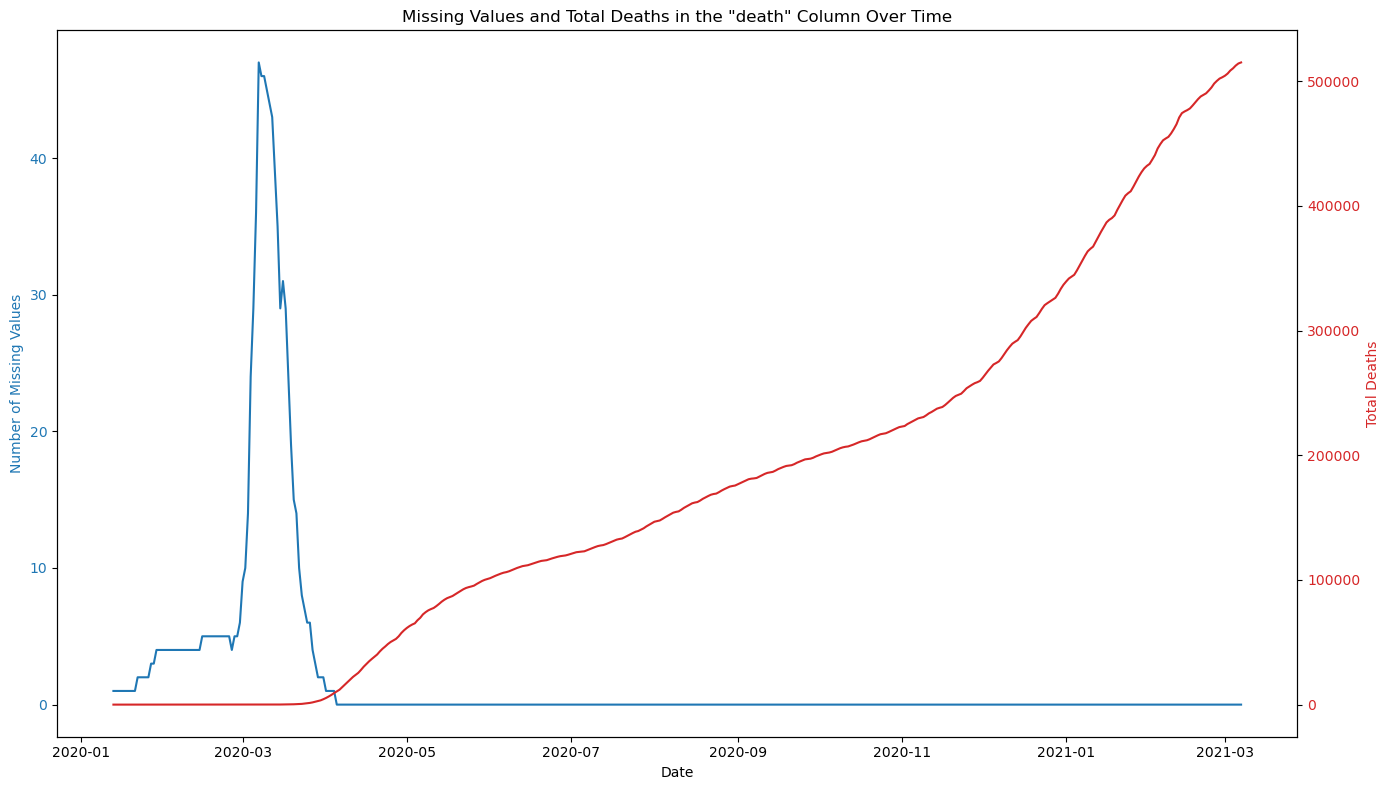

In [468]:
# Exploramos los valores "null" del campo "death" a lo largo del tiempo

# Muertes totales por fecha
total_death_by_date = df.groupby('date')['death'].sum()

# valores nulos en el campo death por fecha
missing_death_by_date = df['death'].isnull().groupby(df['date']).sum()

# Create a secondary y-axis for the total deaths
fig, ax1 = plt.subplots(figsize=(14,8))
#fig.subplots_adjust(right=0.85)

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Missing Values', color=color)
ax1.plot(missing_death_by_date, color=color)  # Change 'missing_death_all_dates' to 'missing_death_by_date'
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Total Deaths', color=color)  # we already handled the x-label with ax1
ax2.plot(total_death_by_date, color=color)  # Change 'total_death_by_date' to total_death_by_date
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Missing Values and Total Deaths in the "death" Column Over Time')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Justificación

Al analizar la gráfica, se puede apreciar que los valores nulos correspondientes al campo "death" (representados por la línea azul) se encuentran concentrados en un período previo al inicio del registro de las primeras muertes en Estados Unidos (representadas por la línea roja). Por consiguiente, podemos inferir que durante este periodo anterior a abril de 2020, es factible reemplazar los valores vacíos por cero, con el objetivo de agilizar un análisis posterior.



In [469]:
# Se procede a cambiar valores faltantes de columna death a 0.
df['death'].fillna(0, inplace=True)

### Se eliminan las columnas que no necesitamos o que tienen datos nulos o vacios

In [470]:
# Definimos las columnas que queremos eliminar
columnas_eliminar = ['checkTimeEt', 'commercialScore', 'dateChecked', 'dateModified', 'grade', 'hash', 
                     'hospitalized', 'negativeIncrease', 'negativeRegularScore', 'negativeScore', 
                     'posNeg', 'positiveScore', 'score', 'total', 'dataQualityGrade']

# Creamos un nuevo dataframe que no incluya esas columnas (deprecated)
df = df.drop(columns=columnas_eliminar)

# Información sobre el dataset (tipo de datos, campos nulos o vacíos)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20780 entries, 0 to 20779
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         20780 non-null  datetime64[ns]
 1   state                        20780 non-null  object        
 2   State_Name                   20780 non-null  object        
 3   positive                     20592 non-null  float64       
 4   probableCases                9271 non-null   float64       
 5   negative                     13290 non-null  float64       
 6   pending                      2138 non-null   float64       
 7   totalTestResultsSource       20780 non-null  object        
 8   totalTestResults             20614 non-null  float64       
 9   hospitalizedCurrently        17339 non-null  float64       
 10  hospitalizedCumulative       12382 non-null  float64       
 11  inIcuCurrently               11636 non-nu

## Funcion Describe - Outliers


In [471]:
#Creamos una variable para agrupar los datos de la columna que queremos graficar
death = df['death'].describe()
print (death)

count    20780.000000
mean      3531.596824
std       6194.636505
min          0.000000
25%        118.000000
50%        982.000000
75%       4159.000000
max      54124.000000
Name: death, dtype: float64


In [472]:
#para sacar el iqr se calculan primero los q1 y q3
q1 = death['25%']
q3 = death['75%']
print(q1)
print(q3)
iqr = q3 - q1
print(iqr)

118.0
4159.0
4041.0


In [473]:
#Se saca el minimos y maximos con los calculos anteriores
max_death = q3 + 1.5*iqr
min_death = q1 - 1.5*iqr
print(max_death)
print(min_death)

10220.5
-5943.5


In [474]:
#Se crea la variable del filtro lower_limit
#Reviso cuales valores estan por debajo del limite minimo (se mostrarán con True y False)
lower_limit = (df['death'] < min_death)

lower_limit

0        False
1        False
2        False
3        False
4        False
         ...  
20775    False
20776    False
20777    False
20778    False
20779    False
Name: death, Length: 20780, dtype: bool

In [475]:
#Se prueba el filtro para revisar si hay outliers
df[lower_limit]

,date,state,State_Name,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,death,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease


In [476]:
#Se crea la variable del filtro upper_limit
#Reviso cuales valores estan por encima del limite maximo (se mostrarán con True y False)
upper_limit = (df['death'] > max_death)

upper_limit

0        False
1        False
2        False
3        False
4         True
         ...  
20775    False
20776    False
20777    False
20778    False
20779    False
Name: death, Length: 20780, dtype: bool

In [477]:
#Se prueba el filtro para revisar si hay outliers
df[upper_limit]

,date,state,State_Name,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,lastUpdateEt,death,hospitalizedDischarged,totalTestsViral,positiveTestsViral,negativeTestsViral,positiveCasesViral,deathConfirmed,deathProbable,totalTestEncountersViral,totalTestsPeopleViral,totalTestsAntibody,positiveTestsAntibody,negativeTestsAntibody,totalTestsPeopleAntibody,positiveTestsPeopleAntibody,negativeTestsPeopleAntibody,totalTestsPeopleAntigen,positiveTestsPeopleAntigen,totalTestsAntigen,positiveTestsAntigen,fips,positiveIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease
4,2021-03-07,AZ,Arizona,826454.0,56519.0,3073010.0,NaN,totalTestsViral,7908105.0,963.0,57907.0,273.0,NaN,143.0,NaN,NaN,3/7/2021 00:00,16328.0,118932.0,7908105.0,NaN,NaN,769935.0,14403.0,1925.0,NaN,3842945.0,580569.0,NaN,NaN,444089.0,NaN,NaN,NaN,NaN,NaN,NaN,04,1335,45110,5,44
5,2021-03-07,CA,California,3501394.0,NaN,NaN,NaN,totalTestsViral,49646014.0,4291.0,NaN,1159.0,NaN,NaN,NaN,NaN,3/7/2021 02:59,54124.0,NaN,49646014.0,NaN,NaN,3501394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06,3816,133186,258,0
10,2021-03-07,FL,Florida,1909209.0,360372.0,9339038.0,8544.0,totalTestEncountersViral,22339182.0,3307.0,82237.0,NaN,NaN,NaN,NaN,NaN,3/6/2021 23:59,32266.0,NaN,19482607.0,2502506.0,16887410.0,1548837.0,NaN,NaN,22339182.0,11248247.0,1054711.0,190026.0,864153.0,995580.0,178979.0,816231.0,NaN,NaN,NaN,NaN,12,4024,64599,66,92
11,2021-03-07,GA,Georgia,1023487.0,195151.0,NaN,NaN,totalTestsViral,7359069.0,2008.0,56797.0,NaN,9263.0,NaN,NaN,NaN,3/7/2021 14:50,17906.0,NaN,7359069.0,803515.0,NaN,828336.0,15598.0,2308.0,NaN,NaN,482568.0,78312.0,NaN,NaN,NaN,NaN,NaN,NaN,1484921.0,168867.0,13,1709,18827,1,35
16,2021-03-07,IL,Illinois,1198335.0,NaN,NaN,NaN,totalTestsViral,18640190.0,1141.0,NaN,255.0,NaN,112.0,NaN,NaN,3/7/2021 00:00,23014.0,NaN,18640190.0,NaN,NaN,NaN,20763.0,2251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,1068,68094,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18125,2020-04-18,NY,New York,236732.0,NaN,NaN,NaN,totalTestEncountersViral,596532.0,16967.0,NaN,4996.0,NaN,NaN,NaN,NaN,4/18/2020 00:00,13362.0,35458.0,NaN,NaN,NaN,NaN,NaN,NaN,596532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,7090,23309,540,0
18181,2020-04-17,NY,New York,229642.0,NaN,NaN,NaN,totalTestEncountersViral,573223.0,17316.0,NaN,5039.0,NaN,NaN,NaN,NaN,4/17/2020 14:00,12822.0,33392.0,NaN,NaN,NaN,NaN,NaN,NaN,573223.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,7358,22644,630,0
18237,2020-04-16,NY,New York,222284.0,NaN,NaN,NaN,totalTestEncountersViral,550579.0,17735.0,NaN,5071.0,NaN,NaN,NaN,NaN,4/16/2020 00:00,12192.0,30800.0,NaN,NaN,NaN,NaN,NaN,NaN,550579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,8505,24567,606,0
18293,2020-04-15,NY,New York,213779.0,NaN,NaN,NaN,totalTestEncountersViral,526012.0,18335.0,NaN,5205.0,NaN,NaN,NaN,NaN,4/15/2020 00:00,11586.0,28004.0,NaN,NaN,NaN,NaN,NaN,NaN,526012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,11571,26869,752,0


## Graficas

In [478]:
#Se grafica la columna death sin filtros outlier
px.box(df, y = 'death')

In [479]:
#Se aplica el filtro de max outliers de columna death.
#Diagrama de cajas Interactiva
px.box(df, y = df[upper_limit]['death'])

### Visualización de las primeras filas del dataset con información de fecha y muertes


In [480]:
#Se cambia el formato de la columna date por formato fecha

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['death'] = df['death'].apply(lambda x: str(x).rstrip('.0'))
df['deathIncrease'] = df['deathIncrease'].apply(lambda x: 'NoIncrease' if x == 0 else x)
df[['date', 'state', 'death', 'deathIncrease']].sort_values(by='date', ascending=False).head(10)

,date,state,death,deathIncrease
0,2021-03-07,AK,305,NoIncrease
29,2021-03-07,MT,1381,NoIncrease
31,2021-03-07,ND,1478,NoIncrease
32,2021-03-07,NE,2113,NoIncrease
33,2021-03-07,NH,1184,3
34,2021-03-07,NJ,23574,17
35,2021-03-07,NM,3808,12
36,2021-03-07,NV,5037,1
37,2021-03-07,NY,39029,59
38,2021-03-07,OH,17656,NoIncrease
